In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
dt= pd.read_csv('medallists.csv')
dt.sample(7)

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
2031,2024-08-10,Gold Medal,1.0,REISTAD Henny,Female,NOR,Norway,Norway,Norway,Norway,W,Handball,Women,HTEAM,/en/paris-2024/results/handball/women/fnl-0001...,1999-02-09,1878495,HBLWTEAM7---NOR01
1814,2024-08-09,Gold Medal,1.0,VERSCHOOR Maria,Female,NED,Netherlands,Netherlands,Netherlands,Netherlands,W,Hockey,Women,HTEAM,/en/paris-2024/results/hockey/women/fnl-000100--,1994-04-22,1971975,HOCWTEAM11--NED01
1007,2024-07-31,Bronze Medal,3.0,APITHY Bolade,Male,FRA,France,France,France,France,M,Fencing,Men's Sabre Team,HTEAM,/en/paris-2024/results/fencing/men-s-sabre-tea...,1985-08-21,1916230,FENMTEAMSABRFRA01
727,2024-08-11,Gold Medal,1.0,LAVREYSEN Harrie,Male,NED,Netherlands,Netherlands,Netherlands,NaN,NaN,Cycling Track,Men's Keirin,ATH,/en/paris-2024/results/cycling-track/men-s-kei...,1997-03-14,1969182,NaN
733,2024-08-11,Gold Medal,1.0,ANDREWS Ellesse,Female,NZL,New Zealand,New Zealand,New Zealand,NaN,NaN,Cycling Track,Women's Sprint,ATH,/en/paris-2024/results/cycling-track/women-s-s...,1999-12-31,1945040,NaN
1181,2024-08-02,Gold Medal,1.0,MACHAC Tomas,Male,CZE,Czechia,Czechia,Czechia,Siniakova / Machac,X,Tennis,Mixed Doubles,HCOUP,/en/paris-2024/results/tennis/mixed-doubles/fn...,2000-10-13,1901333,TENXDOUBLES-CZE01
1304,2024-08-03,Bronze Medal,3.0,HOLLINGSWORTH Henry,Male,USA,United States,United States of America,United States,United States of America,M,Rowing,Men's Eight,TEAM,/en/paris-2024/results/rowing/men-s-eight/fnl-...,1997-09-05,1944696,ROWMCOXED8--USA01



1. **medal_date**: This column likely represents the date when the medal was awarded. The format is probably a date (e.g., "YYYY-MM-DD").

2. **medal_type**: Indicates the type of medal won by the athlete, such as "Gold," "Silver," or "Bronze."

3. **medal_code**: A code associated with the type of medal. It could be an abbreviation or a numerical code representing different medals.

4. **name**: The name of the athlete who won the medal.

5. **gender**: The gender of the athlete, usually represented as "Male" or "Female."

6. **country_code**: A short code (usually a three-letter abbreviation) representing the country of the athlete (e.g., "USA" for the United States).

7. **country**: The name of the country the athlete represents.

8. **country_long**: The full name of the country, possibly including more details or a longer version of the name (e.g., "United States of America" instead of "USA").

9. **nationality**: The nationality of the athlete, which might differ slightly from the country code or country (e.g., "American" for someone from the USA).

10. **team**: The name of the team the athlete is part of, if applicable. In individual sports, this might just be the athlete's name.

11. **team_gender**: The gender category of the team, such as "Men's," "Women's," or "Mixed."

12. **discipline**: The sport or discipline in which the medal was won (e.g., "Swimming," "Athletics").

13. **event**: The specific event within the discipline (e.g., "100m Freestyle" in Swimming).

14. **event_type**: Additional classification of the event, which could specify more details, like "Final" or "Preliminary."

15. **url_event**: A URL or link to more information about the event, possibly leading to an online page with results or event details.

16. **birth_date**: The birthdate of the athlete, likely formatted as "YYYY-MM-DD."

17. **code_athlete**: A unique code or identifier assigned to the athlete, which might be used for tracking purposes in the dataset.

18. **code_team**: A unique code or identifier assigned to the team, similar to the athlete code but for teams.



In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   medal_date    2315 non-null   object 
 1   medal_type    2315 non-null   object 
 2   medal_code    2314 non-null   float64
 3   name          2312 non-null   object 
 4   gender        2312 non-null   object 
 5   country_code  2312 non-null   object 
 6   country       2312 non-null   object 
 7   country_long  2312 non-null   object 
 8   nationality   2310 non-null   object 
 9   team          1555 non-null   object 
 10  team_gender   1555 non-null   object 
 11  discipline    2315 non-null   object 
 12  event         2315 non-null   object 
 13  event_type    2315 non-null   object 
 14  url_event     2294 non-null   object 
 15  birth_date    2312 non-null   object 
 16  code_athlete  2315 non-null   int64  
 17  code_team     1555 non-null   object 
dtypes: float64(1), int64(1), obj

In [5]:
datetime = ['medal_date', 'birth_date']  

for col in datetime:
    dt[col] = pd.to_datetime(dt[col], errors='coerce')

In [6]:
dt.duplicated().sum()

0

In [7]:
dt.isnull().sum() / len(dt) * 100

medal_date       0.000000
medal_type       0.000000
medal_code       0.043197
name             0.129590
gender           0.129590
country_code     0.129590
country          0.129590
country_long     0.129590
nationality      0.215983
team            32.829374
team_gender     32.829374
discipline       0.000000
event            0.000000
event_type       0.000000
url_event        0.907127
birth_date       0.129590
code_athlete     0.000000
code_team       32.829374
dtype: float64

#### It is clear that there are three columns with approximately 33% empty values, but after reviewing the data field, I found that this is normal because there are individual games and most of the empty columns are information about the teams.

### Analytical Questions:

In [10]:
## How many medals were awarded on each date?
print (dt.groupby('medal_date')['medal_type'].count().sort_values())
print ('|' * 80)
print (dt['medal_date'].value_counts())

medal_date
2024-07-28     47
2024-08-06     56
2024-07-31     86
2024-07-29     89
2024-08-01     99
2024-08-05     99
2024-07-27    112
2024-07-30    113
2024-08-02    120
2024-08-04    121
2024-08-07    124
2024-08-11    178
2024-08-08    180
2024-08-03    244
2024-08-09    276
2024-08-10    371
Name: medal_type, dtype: int64
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
medal_date
2024-08-10    371
2024-08-09    276
2024-08-03    244
2024-08-08    180
2024-08-11    178
2024-08-07    124
2024-08-04    121
2024-08-02    120
2024-07-30    113
2024-07-27    112
2024-08-01     99
2024-08-05     99
2024-07-29     89
2024-07-31     86
2024-08-06     56
2024-07-28     47
Name: count, dtype: int64


In [11]:
## Which athlete has won the most medals across all events?
print (dt['name'].value_counts().head())

name
ZHANG Yufei           6
O'CALLAGHAN Mollie    5
MARCHAND Leon         5
SMITH Regan           5
McKEOWN Kaylee        5
Name: count, dtype: int64


In [12]:
## What is the total number of medals awarded?
dt['medal_type'].count()

2315

In [24]:
## Which countries won the most medals?
dt['country'].value_counts().head(3)

country
United States    330
France           186
China            168
Name: count, dtype: int64

In [26]:
## How are medals distributed between male and female athletes?
dt['gender'].value_counts()

gender
Female    1162
Male      1150
Name: count, dtype: int64

In [32]:
## Which events had the highest number of medals awarded?
dt['event'].value_counts().head(10)

event
Men                              342
Women                            338
Mixed Team                        55
Women's Team                      33
Men's Team                        33
Men's Eight                       27
Women's Eight                     27
Team                              27
Women's 4 x 100m Medley Relay     23
Women's 4 x 400m Relay            23
Name: count, dtype: int64

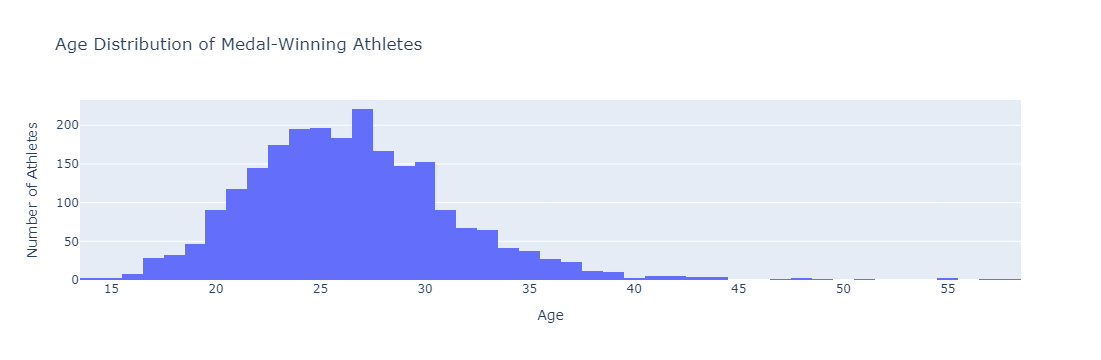

In [44]:
## What is the age distribution of medal-winning athletes?

# Calculate age at the time of the event
event_date = pd.to_datetime('2024-07-27')
dt['age'] = (event_date - dt['birth_date']).dt.days // 365

# Plot age distribution using Plotly Express
fig = px.histogram(dt, x='age', nbins=50, title='Age Distribution of Medal-Winning Athletes')
fig.update_layout(xaxis_title='Age', yaxis_title='Number of Athletes')
fig.show()

In [53]:
## Who are the youngest and oldest medalists?

youngest_medalist = dt.loc[dt['age'].idxmin()]
oldest_medalist = dt.loc[dt['age'].idxmax()]

print("Youngest Medalist:")
print(youngest_medalist[['name', 'age', 'country', 'event', 'medal_type']])

print("\nOldest Medalist:")
print(oldest_medalist[['name', 'age', 'country', 'event', 'medal_type']])

Youngest Medalist:
name          YOSHIZAWA Coco
age                     14.0
country                Japan
event         Women's Street
medal_type        Gold Medal
Name: 52, dtype: object

Oldest Medalist:
name            KRAUT Laura
age                    58.0
country       United States
event          Jumping Team
medal_type     Silver Medal
Name: 1126, dtype: object


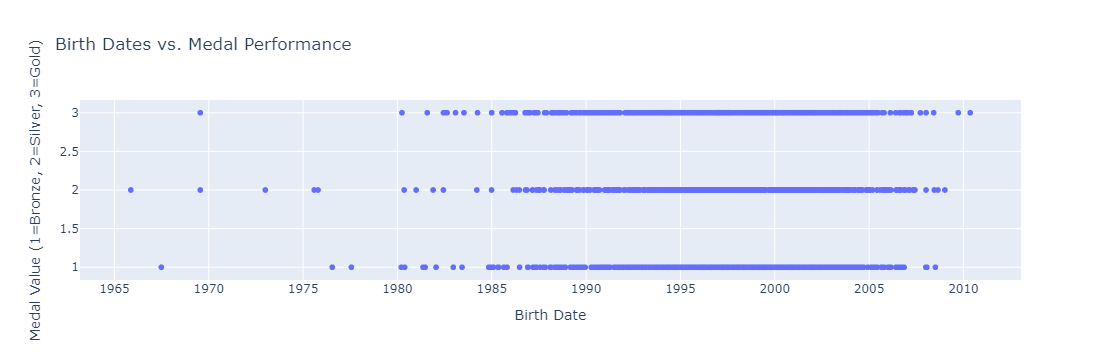

In [69]:
## Is there any correlation between athletes' birth dates and their performance?

# Plot birth dates vs. medal values using Plotly Express
fig = px.scatter(dt, x='birth_date', y='medal_code', title='Birth Dates vs. Medal Performance')
fig.update_layout(xaxis_title='Birth Date', yaxis_title='Medal Value (1=Bronze, 2=Silver, 3=Gold)')
fig.show()

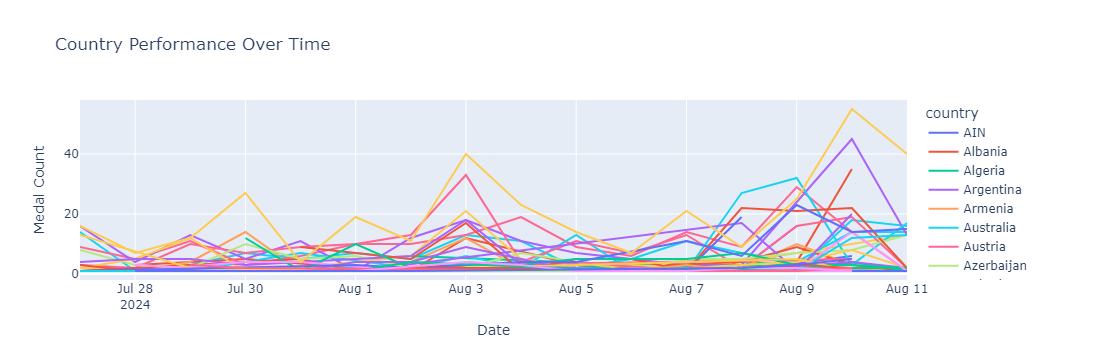

In [72]:
## How did each country perform over time?
medal_counts_over_time = dt.groupby(['country', 'medal_date']).size().reset_index(name='medal_count')

# Plot medal counts over time using Plotly Express
fig = px.line(medal_counts_over_time, x='medal_date', y='medal_count', color='country', title='Country Performance Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Medal Count')
fig.show()

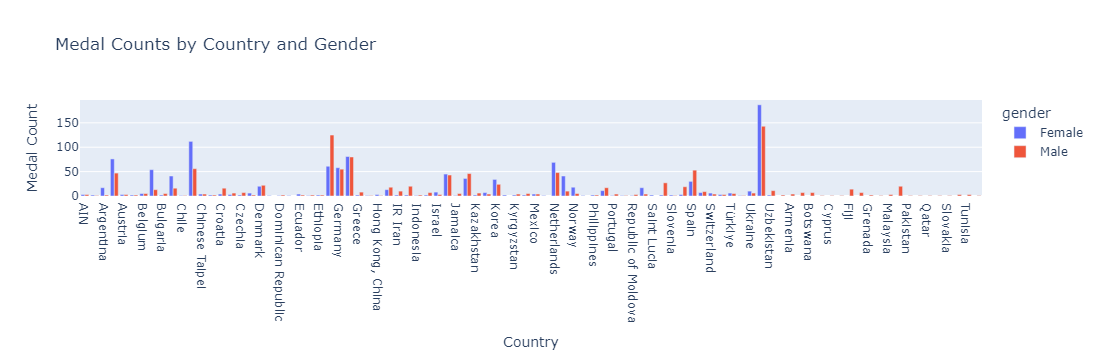

In [90]:
##  How do different countries perform in terms of gender?

medal_counts_by_gender = dt.groupby(['country', 'gender']).size().reset_index(name='medal_count')

# Plot medal counts by country and gender using Plotly Express
fig = px.bar(medal_counts_by_gender, x='country', y='medal_count', color='gender', barmode='group', title='Medal Counts by Country and Gender')
fig.update_layout(xaxis_title='Country', yaxis_title='Medal Count')
fig.show()

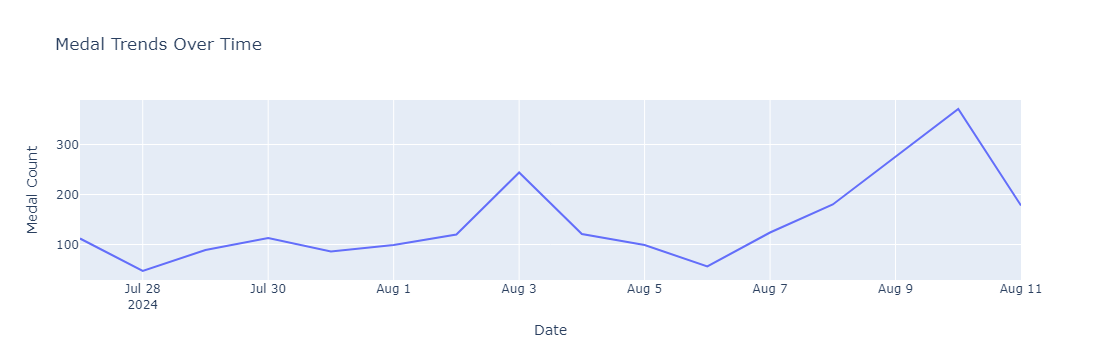

In [97]:
## How did the number of medals awarded change over the course of the Olympics?

medal_trends = dt.groupby('medal_date').size().reset_index(name='medal_count')
# Plot medal trends over time using Plotly Express
fig = px.line(medal_trends, x='medal_date', y='medal_count', title='Medal Trends Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Medal Count')
fig.show()

C:\Users\victus\AppData\Local\Temp\ipykernel_27052\3279311510.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



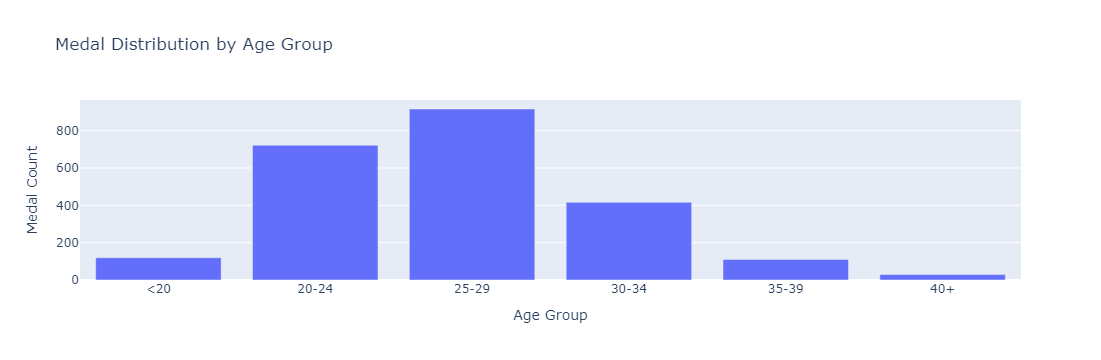

In [110]:
## How are medals distributed across different age groups of athletes?

dt['age'] = (event_date - dt['birth_date']).dt.days // 365

# Define age groups
bins = [0, 20, 25, 30, 35, 40, 100]
labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40+']

# Add age group column to DataFrame
dt['age_group'] = pd.cut(dt['age'], bins=bins, labels=labels, right=False)

# Group by age group and count medals
medal_counts_by_age_group = dt.groupby('age_group').size().reset_index(name='medal_count')

# Plot medal counts by age group using Plotly Express
fig = px.bar(medal_counts_by_age_group, x='age_group', y='medal_count', title='Medal Distribution by Age Group')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Medal Count')
fig.show()


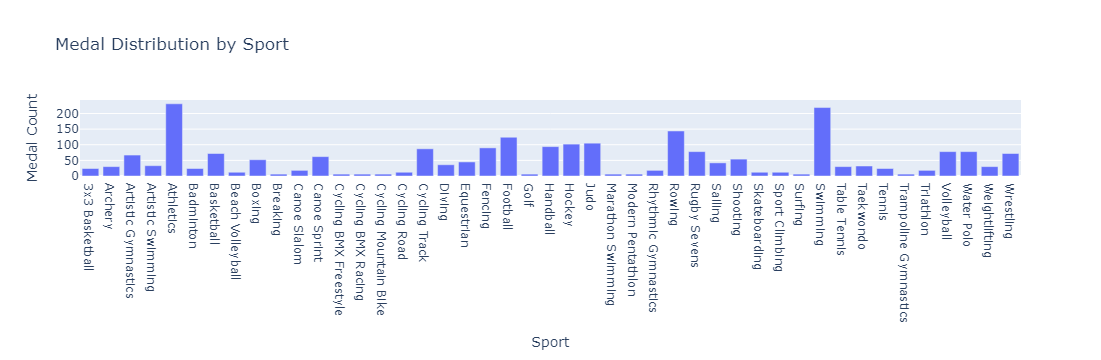

In [112]:
## Which sports had the highest number of medals awarded?

medal_counts_by_sport = dt.groupby('discipline').size().reset_index(name='medal_count')
# Plot medal counts by sport using Plotly Express
fig = px.bar(medal_counts_by_sport, x='discipline', y='medal_count', title='Medal Distribution by Sport')
fig.update_layout(xaxis_title='Sport', yaxis_title='Medal Count')
fig.show()

In [116]:
## Who are the top-performing athletes in each sport?

top_athletes_by_sport = dt.groupby(['discipline', 'name']).size().reset_index(name='medal_count')
# Sort by medal count and get top athletes
top_athletes_by_sport = top_athletes_by_sport.sort_values(by='medal_count', ascending=False).groupby('discipline').head(1)
top_athletes_by_sport

,discipline,name,medal_count
1696,Swimming,ZHANG Yufei,6
52,Artistic Gymnastics,BILES Simone,4
37,Archery,LIM Sihyeon,3
574,Cycling Track,ANDREWS Ellesse,3
499,Canoe Sprint,CARRINGTON Lisa,3
292,Athletics,THOMAS Gabrielle,3
1715,Table Tennis,SUN Yingsha,3
1174,Judo,NAGAYAMA Ryuju,2
116,Artistic Swimming,WANG Liuyi,2
677,Equestrian,COLLETT Laura,2


In [126]:
## Which countries have the highest number of top-performing athletes?

top_athletes_by_country = dt.groupby(['country', 'name']).size().reset_index(name='medal_count')
# Sort by medal count and get top athletes
top_athletes_by_country = top_athletes_by_country.sort_values(by='medal_count', ascending=False).groupby('country').head(1)
top_athletes_by_country

,country,name,medal_count
405,China,ZHANG Yufei,6
88,Australia,McKEOWN Kaylee,5
1996,United States,SMITH Regan,5
653,France,MARCHAND Leon,5
260,Canada,McINTOSH Summer,4
1195,Japan,OKA Shinnosuke,4
165,Brazil,ANDRADE Rebeca,4
1273,Korea,LIM Sihyeon,3
1357,Netherlands,HASSAN Sifan,3
1441,New Zealand,ANDREWS Ellesse,3


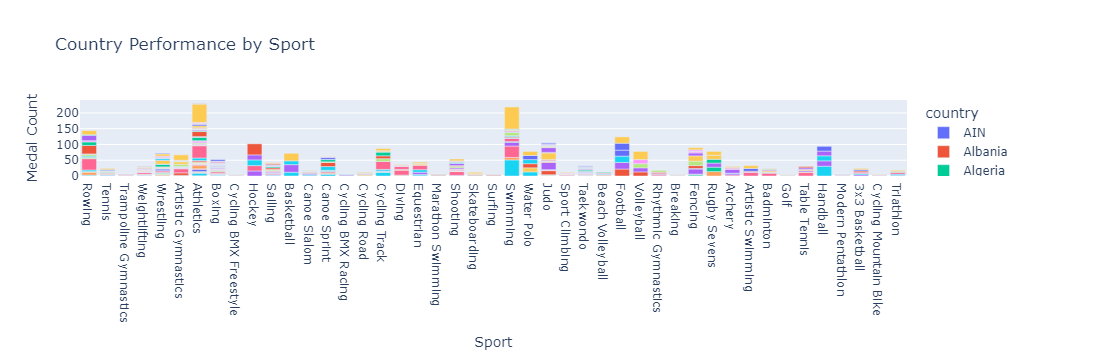

In [128]:
##  Which countries excelled in specific sports?

country_performance_by_sport = dt.groupby(['country', 'discipline']).size().reset_index(name='medal_count')
# Plot country performance by sport using Plotly Express
fig = px.bar(country_performance_by_sport, x='discipline', y='medal_count', color='country', title='Country Performance by Sport')
fig.update_layout(xaxis_title='Sport', yaxis_title='Medal Count')
fig.show()